In [1]:
from hw_demo_estimation import etl, graph_manipulation as gm, data_viz as dv
from egyeni_kodok import harmadik_abra as harmadik, prediction, negyedik_abra as negyedik, hatodik_abra as hatodik
import warnings
warnings.filterwarnings('ignore') 

# Demography Estimation Homework

This is a markdown cell in a jupyter notebook where I can write analysis about the charts and the statistics that I calculated

In [2]:
nodes, edges = etl.load_and_select_profiles_and_edges()

loading profiles
loading edges
1    2642113
2    1992414
Name: source, dtype: int64
Selected profiles: 695406
Nodes with edges: 434590


In [3]:
G=  gm.create_graph_from_nodes_and_edges(nodes, edges)

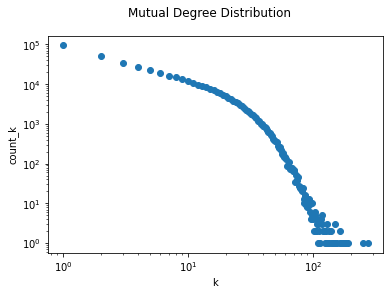

In [4]:
dv.plot_degree_distribution(G)

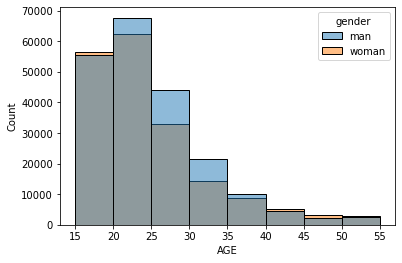

In [5]:
# descriptive analytics of the nodes
# age distribution by gender
dv.plot_age_distribution_by_gender(nodes)

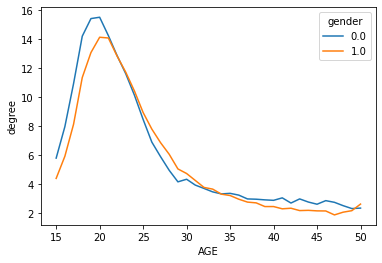

In [6]:
dv.plot_node_degree_by_gender(nodes, G)

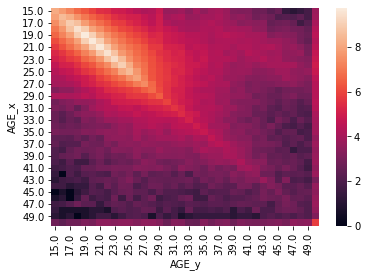

In [7]:
edges_w_features = gm.add_node_features_to_edges(nodes, edges)
dv.plot_age_relations_heatmap(edges_w_features)
# THE END

## Own work start from here

### Label classification

In [8]:
prediction_dictionary = prediction.decision_tree_classification(nodes, edges)

nodes['gender'] = nodes['gender'].map(prediction_dictionary).fillna(nodes['gender'])


Preparing data...
Data prepared, building the model...
Making the predictions...
The model predicted 27085.0 males, and 12915.0 females


### Reinitializing graph to avoid possible data quality issues

In [9]:
# Filtering to avoid possible disturbance due to missing age values
nodes = nodes[ nodes['TRAIN_TEST'] == 'TRAIN' ]

In [10]:
G=  gm.create_graph_from_nodes_and_edges(nodes, edges)

### 3rd figure recreation

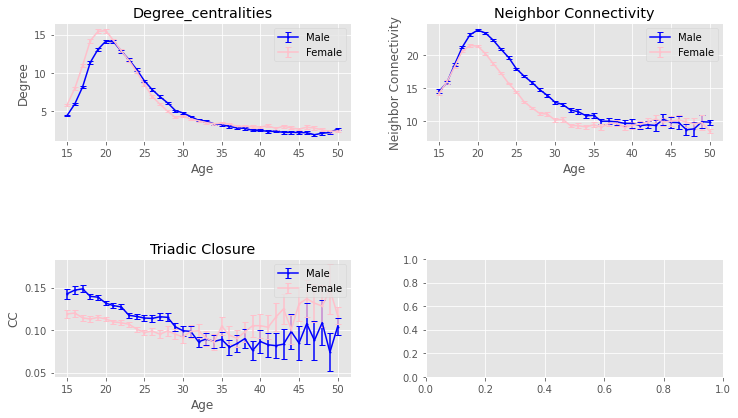

In [11]:
harmadik.create_the_third_plot(G, nodes, edges)

 The outputs turned out different, than in the original article. As expected, the standard errors are increasing as the age progresses - as to be expected.
 What is different though, that the degree centralities, and generally number of friends are generally higher in the case of males.
 The decreasing trend in triadic closure in the case of males was contrary to that we learnt by the moblie calls. Instead of forming new stronger triads (such with family and other relatives), social media triads are fading with the passage of time. 
 
 The decreasing trend of friends overall is quite self-evident, as could be explained by two factors:  
 (i) as people get older, they lose connections, have less free time for social activities, hence only really close connections remain. Not only the friend preserving side, but also the "friend gain" side also decreases, older people meet less and less people as given by their everyday lifestyle, an office worker is around a smaller and more stable community than a high school or university student.
 (ii) old people tend to use social network less, so the forementioned effect is likely to been enchanced by the fact, that a handful of older people's friend are not present in the online space.       
 (iii) The third and new factor is older people tend to use  (if they're peresent at all) to scheduling conversations outside of social media platforms, such as calls or personnal contact, rather than being the place of discussion with either their family member or their close friends.
        

### 4th figure recreation

In [12]:
m_df, f_df = negyedik.give_me_the_dictionary_of_friends_based_on_ids(edges, nodes)

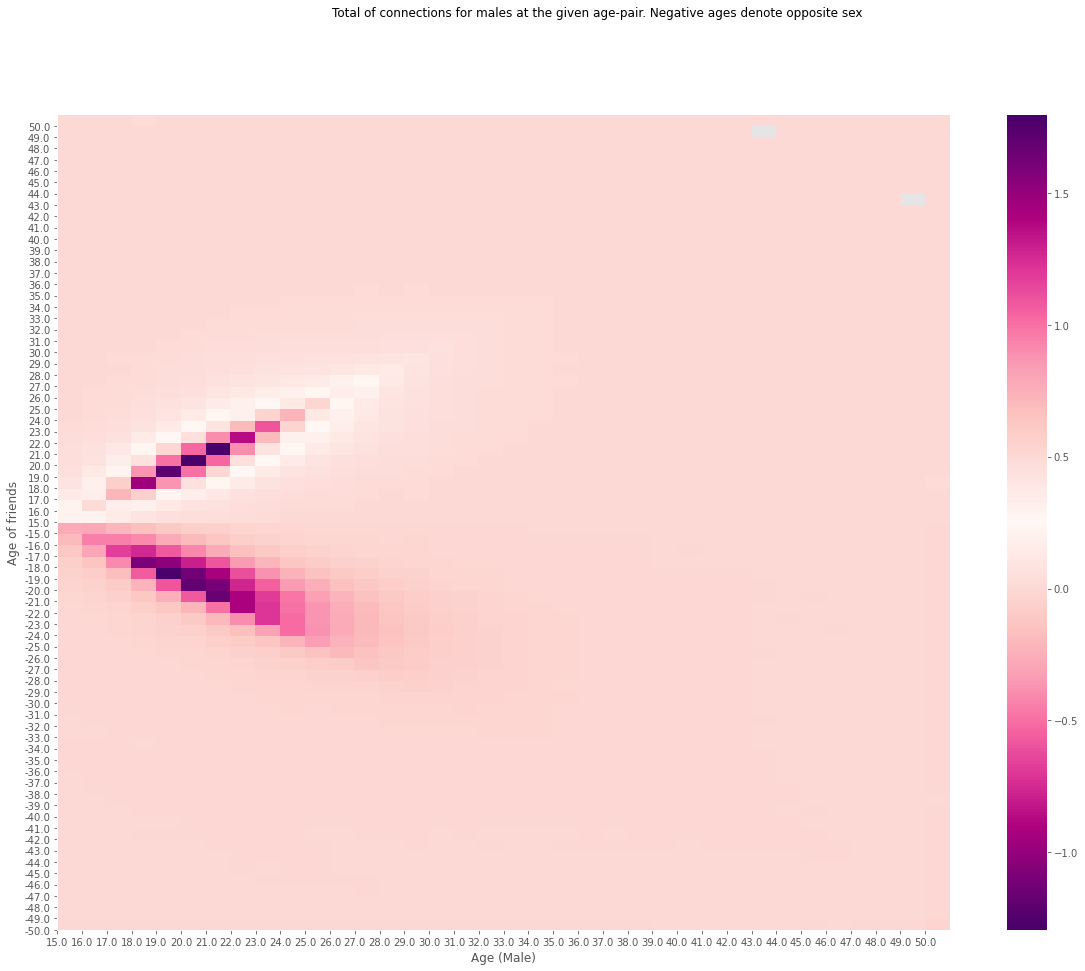

In [13]:
negyedik.plot_male_connections(m_df)

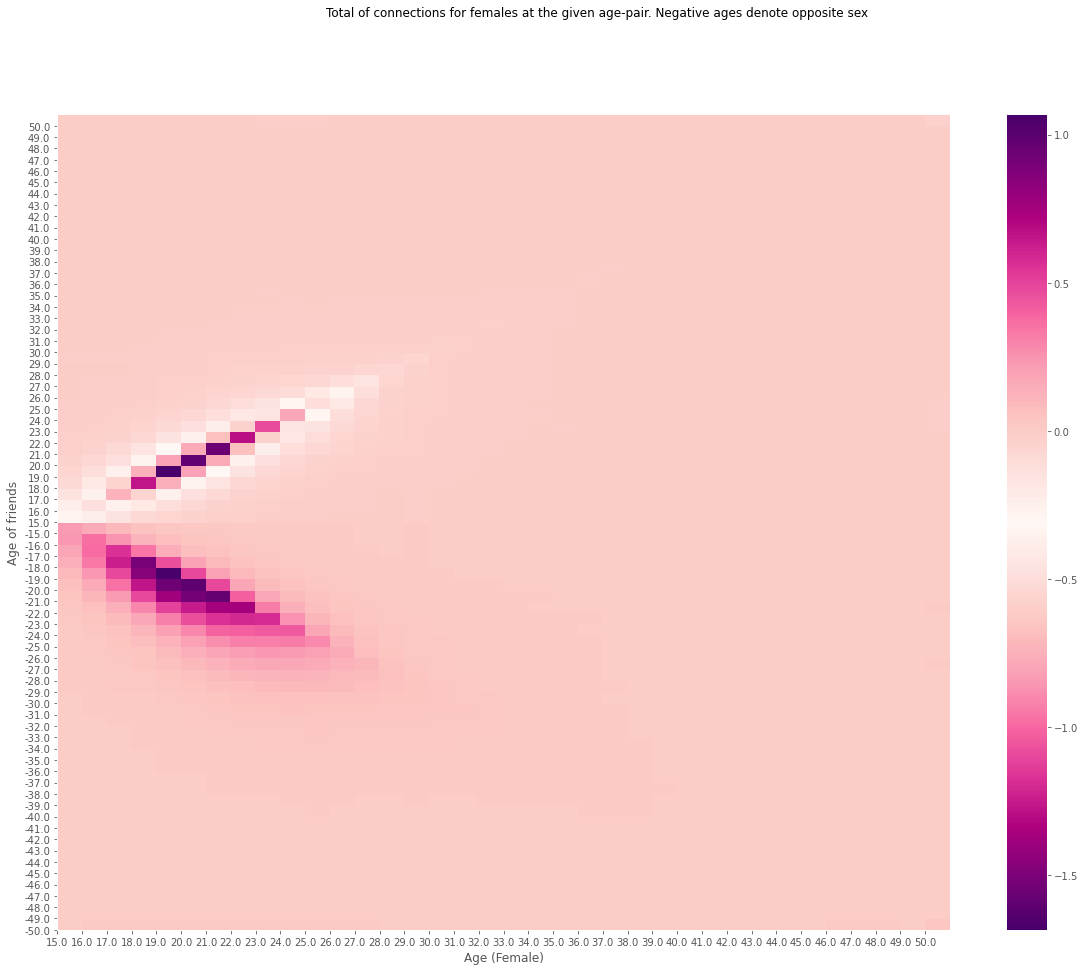

In [14]:
negyedik.plot_female_connections(f_df)

Contrary to the findings in the article, generational bonds could not been found in the current data.
The high freind-density seem to be appearing among people of the same age - even which appears to fade around 30. This is not that surprising, given that the degrees decrease fastly with age. The overwhelming share of the dark areas are due to normalizations, grids are normalized with total number of connections in the network. Which further reinforces our assumptions that as people became older they're using social media less and less as platform to maintain meaningful relationships. 

### 5th figure recreation

This figure would hold the exact same information as the one above. Thus, we did not reproduce due to redundancy

### 6th figure recreation

In [15]:
#getting pivots
male_data = m_df.pivot("friend_age", "user_age", "friend_score")
female_data = f_df.pivot("friend_age", "user_age", "friend_score")
# getting plotable data
female_graph_data = hatodik.bucketing_pivot_table(female_data, 'Female')
male_graph_data = hatodik.bucketing_pivot_table(male_data, 'Male')



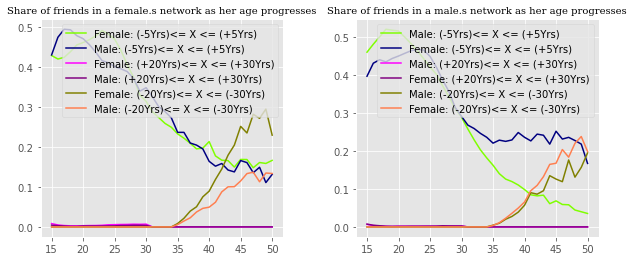

In [16]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize = (10,4))

#female data plot
x = female_graph_data.index
for dataseries, fill_color in zip(female_graph_data.columns, ['chartreuse', 'navy', 'magenta', 'purple', 'olive', 'coral']):
    ax[0].plot(x, female_graph_data[dataseries], color = fill_color, label = dataseries)
ax[0].legend()
ax[0].set_title('Share of friends in a female.s network as her age progresses', {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 10,
        })

#male data plot
x = male_graph_data.index
for dataseries, fill_color in zip(male_graph_data.columns, ['chartreuse', 'navy', 'magenta', 'purple', 'olive', 'coral']):
    ax[1].plot(x, male_graph_data[dataseries], color = fill_color, label = dataseries)
ax[1].legend()
ax[1].set_title('Share of friends in a male.s network as her age progresses', {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 10,
        })

fig.subplots_adjust(wspace = 0.3)

fig.show()

 The evident and expected trends appear on the graph (namely, that e.g. a 20yr old man doesnt have 20yr younger friends, and a 45 yr old 30 yrs older). As expected, the same-age friends are custom at the younger age, but contrary to our precinceptions the share of friends seem to be diversifying in the age dimension from ages 35. 
 What is extremely surprising ("and raises data quality concerns (or even maybe issues in query-consctruction???) )" that the 50 year old men do not really have friends of the same age and gender, whereas females have a lot of friends of minus 20-30 years. 
 
 One possible explanation might be that older people instead maintaining their existing relationships on social media, may be finding new acquanticies via their descendants. They may not call their children's classmates or friends but a looser connection on social media might be maintenable with one annaul birthday wish. Also by social media  being less a 1v1 communication platform comapred to a phone call it is possible that new hobbies or online discussions (arguing with strangers at the internet) or opinion forming can create such new but potentially much looser bonds, which is indicated by graph 4.
 

<AxesSubplot:>

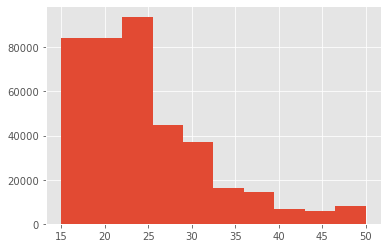

In [17]:
nodes['AGE'].hist()